<a href="https://colab.research.google.com/github/gustavesg/TCC/blob/main/1_Tratamento_Dados_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
#importa bibliotecas necessárias

import pandas as pd
import warnings
from sklearn import decomposition
import numpy as np
from datetime import datetime
import seaborn as sns

#ignore warnings
#ignora alertas
warnings.filterwarnings('ignore')


In [ ]:
#imports database
#importa base

df_treino = pd.read_csv("/content/drive/MyDrive/TCC/1. Base de Dados/dados_refinados/loan_refinada_treino.csv")
df_teste  = pd.read_csv("/content/drive/MyDrive/TCC/1. Base de Dados/dados_refinados/loan_refinada_teste.csv")

##Tratamento colunas tipo string (String variables treatment)

In [ ]:
#get a copy of orignals datasets to treat variables
#vamos usar uma cópia do df original pra criar o df pro modelo

df_treino_models = df_treino.copy()
df_teste_models = df_teste.copy()

**### id & member_id & url**

In [ ]:
#this columns aren't important to the model, then we will drop them from database
#essas colunas não são importantes para o modelo, portanto podem ser excluidas

df_treino_models = df_treino_models.drop(['id','member_id','url'], axis = 1)
df_teste_models = df_teste_models.drop(['id','member_id','url'], axis = 1)

### **term**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['term'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['term'].isnull().sum()/df_teste_models.shape[0])


0.0
0.0


In [ ]:
#element proportion
#proporção de elementos

display(df_treino_models['term'].value_counts(normalize = True))
display(df_teste_models['term'].value_counts(normalize = True))


,proportion
term,
36 months,0.70244
60 months,0.29756


,proportion
term,
36 months,0.700587
60 months,0.299413


In [ ]:
#this variable has value 1 if term is 60 months and 0 if term is 30 months
#variável possui valor 1 se a duração do empréstimo é 60 meses e 0 se for de 30 meses

df_treino_models['term'] = df_treino_models['term'].apply(lambda x: 0 if x == ' 36 months' else 1)
df_teste_models['term'] = df_teste_models['term'].apply(lambda x: 0 if x == ' 36 months' else 1)

### **grade**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['grade'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['grade'].isnull().sum()/df_teste_models.shape[0])



0.0
0.0


In [ ]:
#this variables display client risk classification
#coluna que indica a classificação de risco do cliente

display(df_treino_models['grade'].value_counts(normalize = True))
display(df_teste_models['grade'].value_counts(normalize = True))

,proportion
grade,
C,0.296677
B,0.254840
D,0.179403
A,0.128634
E,0.094191
F,0.035434
G,0.010820


,proportion
grade,
C,0.297560
B,0.254533
D,0.178847
A,0.127013
E,0.095133
F,0.036527
G,0.010387


In [ ]:
#function to convert classification in numbers
#função para converter classif pra numerico

def convert_grade(x):

  if   x == 'A':   x = 1
  elif x == 'B':   x = 2
  elif x == 'C':   x = 3
  elif x == 'D':   x = 4
  elif x == 'E':   x = 5
  elif x == 'F':   x = 6
  elif x == 'G':   x = 7

  return x

In [ ]:
df_treino_models['grade'] = df_treino_models['grade'].apply(convert_grade)
df_teste_models['grade'] = df_teste_models['grade'].apply(convert_grade)

###**sub_grade**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['sub_grade'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['sub_grade'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
#this variable give us more detaleid information than grade variable, we will drop grade and enumerate this variable
#essa coluna tem informações mais detalhadas do que grade, podemos enumerar essa coluna e excluir a grade

print(df_treino_models['sub_grade'].unique())
print(df_teste_models['sub_grade'].unique())

['C5' 'B3' 'C2' 'B2' 'D2' 'C1' 'A5' 'B4' 'D3' 'B5' 'A1' 'A3' 'C4' 'D5'
 'F5' 'B1' 'A4' 'C3' 'D1' 'D4' 'E5' 'A2' 'E3' 'F2' 'E1' 'E2' 'F3' 'F1'
 'G3' 'E4' 'G4' 'F4' 'G1' 'G2' 'G5']
['B5' 'A1' 'C4' 'C5' 'B4' 'B1' 'E2' 'C3' 'C1' 'B3' 'C2' 'B2' 'D3' 'A3'
 'E3' 'A4' 'D2' 'G1' 'E1' 'A5' 'A2' 'F4' 'D4' 'F1' 'D1' 'E4' 'E5' 'D5'
 'F5' 'G3' 'F2' 'G2' 'F3' 'G4' 'G5']


In [ ]:
#transform classification in numbers
#transforma classificação em numeros

def convert_sub_grade(x):

  letters = ['A','B','C','D','E','F','G']
  numbers = ['1','2','3','4','5']

  for i in range(len(letters)):
    for j in range(len(numbers)):

      if x == letters[i] + numbers[j]:

         x = 5*i + (j+1)

  return x

In [ ]:
#applies convertion function and drops variable grade
#aplica a função para converter e exclui a coluna de grade

df_treino_models['sub_grade'] = df_treino_models['sub_grade'].apply(convert_sub_grade)
df_teste_models['sub_grade'] = df_teste_models['sub_grade'].apply(convert_sub_grade)

df_treino_models.drop(columns = ['grade'])
df_teste_models.drop(columns = ['grade'])

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,0,11.49,329.72,10,Grocery Night Stocker,7 years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,6000,6000,6000.0,0,5.32,180.69,1,Office Manager,6 years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,32000,32000,32000.0,1,14.31,749.74,14,credit analyst,3 years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,11000,11000,11000.0,1,15.23,263.02,15,belk,6 years,OWN,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,8000,8000,8000.0,0,10.99,261.88,9,Head cook and pt custodian,10+ years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,14400,14400,14400.0,0,14.46,495.39,14,Machanic,3 years,RENT,...,NaN,NaN,Cash,Y,Jun-2018,ACTIVE,Jun-2018,3110.0,50.01,18.0
149996,11500,11500,11500.0,0,6.92,354.67,4,Club Manager,3 years,RENT,...,2784.01,17.57,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
149997,4800,4800,4800.0,0,13.99,164.03,13,Owner,2 years,OWN,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
149998,10000,10000,10000.0,1,17.86,253.18,20,Help Desk Specialist,2 years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### **emp_title**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['emp_title'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['emp_title'].isnull().sum()/df_teste_models.shape[0])


0.07101428571428571
0.07011333333333333


In [ ]:
df_treino_models['emp_title'].value_counts(normalize = True)

,proportion
emp_title,
Teacher,0.016190
Manager,0.015467
Owner,0.008904
Driver,0.006914
Registered Nurse,0.006911
...,...
Government Relations Representative,0.000003
Cravath Swaine & Moore LLP,0.000003
Follett Higher Education Group,0.000003


In [ ]:
#emp_title assume valor 1 se tem emprego e 0 caso contrário
#variable emp_title is 1 if original emp_tile is not null and 0 if null


df_treino_models['emp_title'] = df_treino_models['emp_title'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)
df_teste_models['emp_title'] = df_teste_models['emp_title'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)



In [ ]:
#validation
#validação

display(df_treino_models['emp_title'].value_counts(normalize = True))
display(df_treino_models['emp_title'].value_counts(normalize = True))

,proportion
emp_title,
1,0.928986
0,0.071014


,proportion
emp_title,
1,0.928986
0,0.071014


###**emp_length**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['emp_length'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['emp_length'].isnull().sum()/df_teste_models.shape[0])

0.06568285714285714
0.06506


In [ ]:
#class proportion
#proporção das classes

display(df_treino_models['emp_length'].value_counts(normalize = True).reset_index())
display(df_teste_models['emp_length'].value_counts(normalize = True).reset_index())

,emp_length,proportion
0,10+ years,0.342949
1,2 years,0.095981
2,< 1 year,0.087379
3,3 years,0.084826
4,1 year,0.071233
5,5 years,0.066820
6,4 years,0.063756
7,6 years,0.049867
8,8 years,0.049127
9,7 years,0.047699


,emp_length,proportion
0,10+ years,0.343673
1,2 years,0.096206
2,< 1 year,0.088105
3,3 years,0.085710
4,1 year,0.071391
5,5 years,0.066300
6,4 years,0.063462
7,7 years,0.048595
8,6 years,0.048559
9,8 years,0.048203


In [ ]:
#converts in number
#converte em numero

def convert_emp_length(x):

  if x == '< 1 year':  x = 1
  elif x == '1 year':  x = 2
  elif x == '2 years': x = 3
  elif x == '3 years': x = 4
  elif x == '4 years': x = 5
  elif x == '5 years': x = 6
  elif x == '6 years': x = 7
  elif x == '7 years': x = 8
  elif x == '8 years': x = 9
  elif x == '9 years': x = 10
  elif x == '10+ years': x = 11

  return x

In [ ]:
df_treino_models['emp_length'] = df_treino_models['emp_length'].apply(convert_emp_length)
df_teste_models['emp_length'] = df_teste_models['emp_length'].apply(convert_emp_length)

### **home_ownership**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['home_ownership'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['home_ownership'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
# class proportions
# proporçao das classes

display(df_treino_models['home_ownership'].value_counts(normalize = True))
display(df_teste_models['home_ownership'].value_counts(normalize = True))

,proportion
home_ownership,
MORTGAGE,0.470229
RENT,0.421243
OWN,0.108177
ANY,0.000203
OTHER,0.000126
NONE,0.000023


,proportion
home_ownership,
MORTGAGE,0.470053
RENT,0.421080
OWN,0.108553
ANY,0.000187
OTHER,0.000093
NONE,0.000033


In [ ]:
#converts in number
#converte em numero

def convert_ownership(x):

  if   x == 'MORTGAGE': x = 1
  elif x == 'RENT':     x = 2
  elif x == 'OWN':      x = 3
  else:                 x = 4

  return x


In [ ]:
df_treino_models['home_ownership'] = df_treino_models['home_ownership'].apply(convert_ownership)
df_teste_models['home_ownership'] = df_teste_models['home_ownership'].apply(convert_ownership)

### **verification_status**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['verification_status'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['verification_status'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
print(df_treino_models['verification_status'].unique())
print(df_teste_models['verification_status'].unique())


['Source Verified' 'Verified' 'Not Verified']
['Source Verified' 'Not Verified' 'Verified']


In [ ]:
# class proportions
# proporçao das classes

display(df_treino_models['verification_status'].value_counts(normalize = True))
display(df_teste_models['verification_status'].value_counts(normalize = True))

,proportion
verification_status,
Source Verified,0.393611
Verified,0.335703
Not Verified,0.270686


,proportion
verification_status,
Source Verified,0.393720
Verified,0.337353
Not Verified,0.268927


In [ ]:
#converts in number
#converte em numero

def convert_verification(x):

  if   x == 'Not Verified':     x = 1
  elif x == 'Source Verified':  x = 2
  elif x == 'Verified':         x = 3

  return x


In [ ]:
#apply function
df_treino_models['verification_status'] = df_treino_models['verification_status'].apply(convert_verification)
df_teste_models['verification_status'] = df_teste_models['verification_status'].apply(convert_verification)

### **issue_d**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['issue_d'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['issue_d'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
#essa variável representa a data em que o empréstimo foi formalizado e como estamos supondo que os clientes tem o mesmo comportamento no tempo, vamos descarta-la
#this variable represents the date the loan was formalized, and since we are assuming that customers have the same behavior over time, we will discard it

df_treino_models = df_treino_models.drop(columns = ['issue_d'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['issue_d'], axis = 1)

### **pymnt_plan**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['pymnt_plan'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['pymnt_plan'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
#this column indicates whether there was a pre-agreement between the creditor and the payer. Since all values are 'n', it's not worth including it in the model.
#essa coluna indica se houve um pre acordo entre o credor e o pagador, como todos os valores são n, não vale a pena colocar no modelo

display(df_treino_models['pymnt_plan'].value_counts(normalize = True))
display(df_teste_models['pymnt_plan'].value_counts(normalize = True))

,proportion
pymnt_plan,
n,1.0


,proportion
pymnt_plan,
n,1.0


In [ ]:
df_treino_models = df_treino_models.drop(columns = ['pymnt_plan'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['pymnt_plan'], axis = 1)

###**desc**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['desc'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['desc'].isnull().sum()/df_teste_models.shape[0])

0.9136771428571429
0.91182


In [ ]:
#if there is a loan description, assign 1; if not, assign 0
#se tiver descrição do empréstimo associa a 1 se não 0

df_treino_models['desc'] = df_treino_models['desc'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_teste_models['desc'] = df_teste_models['desc'].apply(lambda x: 0 if pd.isnull(x) else 1)


In [ ]:
#validation
#validação

display(df_treino_models['desc'].value_counts(normalize = True))
display(df_treino_models['desc'].value_counts(normalize = True))


,proportion
desc,
0,0.913677
1,0.086323


,proportion
desc,
0,0.913677
1,0.086323


###**purpose**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['purpose'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['purpose'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
#class proportions
display(df_treino_models['purpose'].value_counts(normalize = True))
display(df_teste_models['purpose'].value_counts(normalize = True))

,proportion
purpose,
debt_consolidation,0.593914
credit_card,0.206629
home_improvement,0.062403
other,0.058777
major_purchase,0.021323
small_business,0.013569
medical,0.012089
car,0.009634
moving,0.007383


,proportion
purpose,
debt_consolidation,0.594840
credit_card,0.207127
home_improvement,0.061987
other,0.058080
major_purchase,0.020960
small_business,0.013907
medical,0.011667
car,0.009793
moving,0.007253


In [ ]:
# transform in numbers the three major classes
# transforma em número as três maiores classes

def convert_purpose(x):

  if   x == 'debt_consolidation':           x = 1
  elif x == 'credit_card':                  x = 2
  else:                                     x = 3

  return x

In [ ]:
df_treino_models['purpose'] = df_treino_models['purpose'].apply(convert_purpose)
df_teste_models['purpose'] = df_teste_models['purpose'].apply(convert_purpose)

In [ ]:
#class proportions
display(df_treino_models['purpose'].value_counts(normalize = True))
display(df_teste_models['purpose'].value_counts(normalize = True))

,proportion
purpose,
1,0.593914
2,0.206629
3,0.199457


,proportion
purpose,
1,0.594840
2,0.207127
3,0.198033


###**title**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['title'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['title'].isnull().sum()/df_teste_models.shape[0])

0.014177142857142857
0.01486


In [ ]:
# the information in 'title' is practically the same as in 'purpose', so it's worth just creating a binary variable to indicate whether the 'title' field was filled in or not during registration.
# a informação de title é praticamente a mesma de purpose então vale a pena apenas criar uma binária se a variável title foi preenchida ou não no cadastro

df_treino_models['title'] = df_treino_models['title'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)
df_teste_models['title'] = df_teste_models['title'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)


In [ ]:
#validation
#validação

display(df_treino_models['title'].value_counts(normalize = True))
display(df_teste_models['title'].value_counts(normalize = True))

,proportion
title,
1,0.985823
0,0.014177


,proportion
title,
1,0.98514
0,0.01486


### **zip_code**

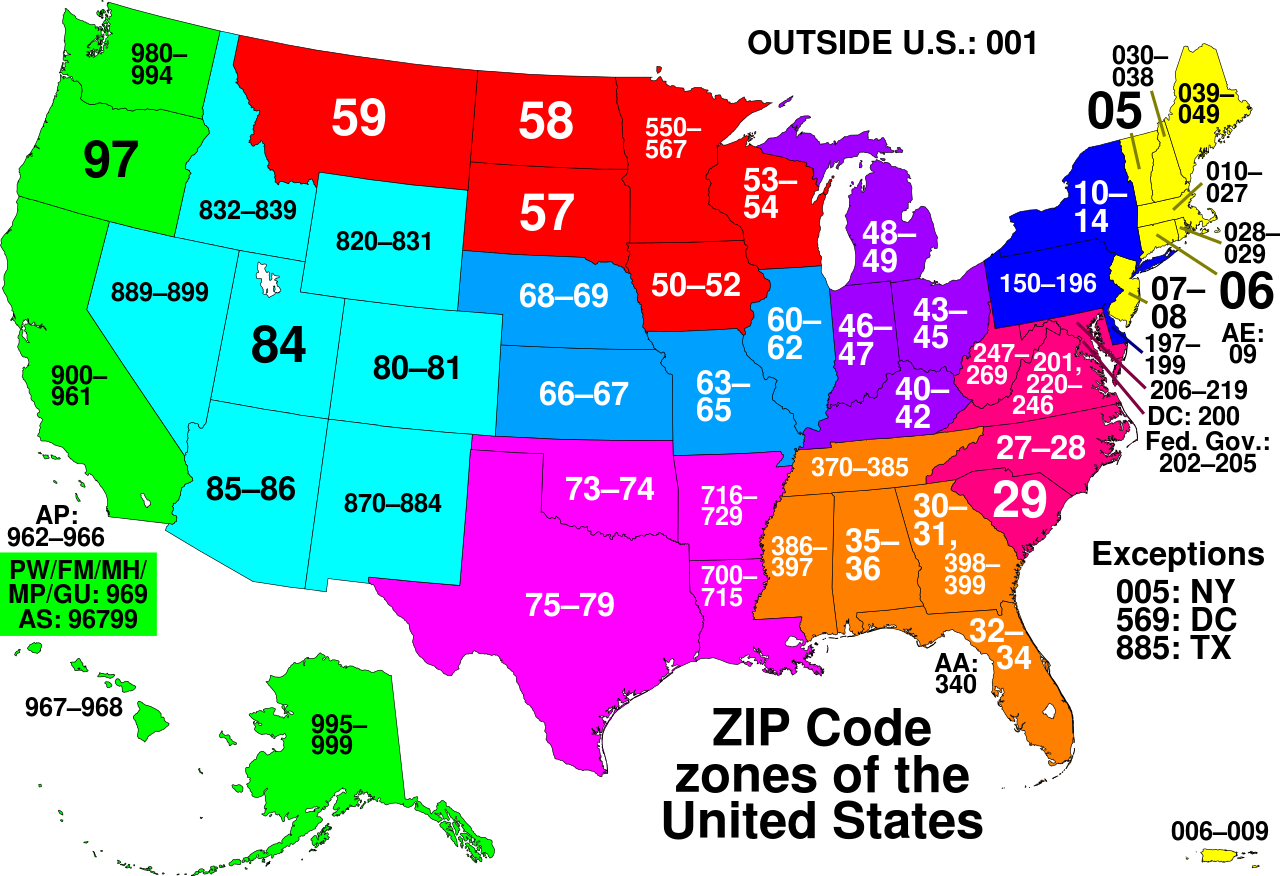

In [ ]:
#convert the 'zip code' variable to string
#transforma varável zip code em string

df_treino_models['zip_code'] = df_treino_models['zip_code'].astype(str)
df_teste_models['zip_code'] = df_teste_models['zip_code'].astype(str)

#get out no treat data
#tira dados não tratados

df_treino_models = df_treino_models[~df_treino_models['zip_code'].str.contains('n')]
df_teste_models = df_teste_models[~df_teste_models['zip_code'].str.contains('n')]

In [ ]:
#tranforms in a numerical variable
#transforma variável em numérica

df_treino_models['zip_code'] = pd.to_numeric(df_treino_models['zip_code'].apply(lambda x: str(x)[0:1]))
df_teste_models['zip_code'] = pd.to_numeric(df_teste_models['zip_code'].apply(lambda x: str(x)[0:1]))


In [ ]:
#validation
#validação

display(df_treino_models['zip_code'].value_counts())
display(df_teste_models['zip_code'].value_counts())

,count
zip_code,
9,64543
3,48271
1,42549
7,39083
2,33977
4,30054
0,29599
8,26626
6,22527


,count
zip_code,
9,27473
3,20674
1,18293
7,16774
2,14479
0,12891
4,12878
8,11490
6,9543


###**addr_state**

In [ ]:
#let's exclude this column because the 'zipcode' alone is sufficient for location
#vamos excluir essa coluna pois apenas a zipcode já é suficiente pra localização

df_treino_models = df_treino_models.drop('addr_state', axis = 1)
df_teste_models = df_teste_models.drop('addr_state', axis = 1)

###**initial_list_status**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['initial_list_status'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['initial_list_status'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
#display class proportions
#proporção das classes

display(df_treino_models['initial_list_status'].value_counts(normalize = True))
display(df_teste_models['initial_list_status'].value_counts(normalize = True))

,proportion
initial_list_status,
w,0.580219
f,0.419781


,proportion
initial_list_status,
w,0.57612
f,0.42388


In [ ]:
# 1 indicates a loan with a single investor and 0 the opposite
# 1 indica empréstimo com investidor único e 0 o contrário

df_treino_models['initial_list_status'] = df_treino_models['initial_list_status'].apply(lambda x: 1 if x == 'w' else 0).astype(int)
df_teste_models['initial_list_status'] = df_teste_models['initial_list_status'].apply(lambda x: 1 if x == 'w' else 0).astype(int)

In [ ]:
#validation
#validação

display(df_treino_models['initial_list_status'].value_counts(normalize = True))
display(df_teste_models['initial_list_status'].value_counts(normalize = True))

,proportion
initial_list_status,
1,0.580219
0,0.419781


,proportion
initial_list_status,
1,0.57612
0,0.42388


###**last_pymnt_d & next_pymnt_d**

In [ ]:
#these variables are generated once the customer is approved for credit, which is not of interest to us.
#essas variaveis são geradas a partir do momento que o cliente é aceito no crédito, o que não nos interessa

df_treino_models = df_treino_models.drop(['last_pymnt_d','next_pymnt_d'], axis = 1)
df_teste_models = df_teste_models.drop(['last_pymnt_d','next_pymnt_d'], axis = 1)

###**application_type**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['application_type'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['application_type'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
#display class proportions
#proporção das classes

display(df_treino_models['application_type'].value_counts(normalize = True))
display(df_teste_models['application_type'].value_counts(normalize = True))

,proportion
application_type,
Individual,0.980614
Joint App,0.019386


,proportion
application_type,
Individual,0.98174
Joint App,0.01826


In [ ]:
df_treino_models['application_type'] = df_treino_models['application_type'].apply(lambda x: 1 if x == 'Individual' else 0).astype(int)
df_teste_models['application_type'] = df_teste_models['application_type'].apply(lambda x: 1 if x == 'Individual' else 0).astype(int)

In [ ]:
#display class proportions
#proporção das classes

display(df_treino_models['application_type'].value_counts(normalize = True))
display(df_teste_models['application_type'].value_counts(normalize = True))

,proportion
application_type,
1,0.980614
0,0.019386


,proportion
application_type,
1,0.98174
0,0.01826


###**verification_status_joint**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['verification_status_joint'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['verification_status_joint'].isnull().sum()/df_teste_models.shape[0])

0.9807228020651487
0.9817666666666667


In [ ]:
#fill nulls by 0
#substitui os nulos por 0

df_treino_models['verification_status_joint'] = df_treino_models['verification_status_joint'].fillna(0)
df_teste_models['verification_status_joint'] = df_teste_models['verification_status_joint'].fillna(0)

In [ ]:
display(df_treino_models['verification_status_joint'].value_counts(normalize = True))
display(df_teste_models['verification_status_joint'].value_counts(normalize = True))

,proportion
verification_status_joint,
0,0.980723
Not Verified,0.010934
Source Verified,0.004737
Verified,0.003606


,proportion
verification_status_joint,
0,0.981767
Not Verified,0.010260
Source Verified,0.004400
Verified,0.003573


In [ ]:
#converts in number
#converte em numérica

def convert_verification_status_joint(x):

  if x == 'Not Verified':         x = 1
  elif x == 'Source Verified':    x = 2
  elif x == 'Verified':           x = 3

  return x

In [ ]:
#applies the functioon
#aplica a função

df_treino_models['verification_status_joint'] = df_treino_models['verification_status_joint'].apply(convert_verification_status_joint)
df_teste_models['verification_status_joint'] = df_teste_models['verification_status_joint'].apply(convert_verification_status_joint)

In [ ]:
display(df_treino_models['verification_status_joint'].value_counts(normalize = True))
display(df_teste_models['verification_status_joint'].value_counts(normalize = True))

,proportion
verification_status_joint,
0,0.980723
1,0.010934
2,0.004737
3,0.003606


,proportion
verification_status_joint,
0,0.981767
1,0.010260
2,0.004400
3,0.003573


###**hardship_flag**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['hardship_flag'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['hardship_flag'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
display(df_treino_models['hardship_flag'].value_counts(normalize = True))
display(df_teste_models['hardship_flag'].value_counts(normalize = True))

,proportion
hardship_flag,
N,0.999997
Y,0.000003


,proportion
hardship_flag,
N,1.0


In [ ]:
#there no data varition in this variable, os we will exclude it because it wont useful for models
#não há variação de data nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['hardship_flag'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['hardship_flag'], axis = 1)

###**hardship_type**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['hardship_type'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['hardship_type'].isnull().sum()/df_teste_models.shape[0])

0.9917999765713617
0.9922


In [ ]:
#there no data  in this variable, os we will exclude it because it wont useful for models
#não há dados nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['hardship_type'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['hardship_type'], axis = 1)

###**hardship_reason**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['hardship_reason'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['hardship_reason'].isnull().sum()/df_teste_models.shape[0])

0.9917999765713617
0.9922


In [ ]:
#there no data  in this variable, os we will exclude it because it wont useful for models
#não há dados nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['hardship_reason'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['hardship_reason'], axis = 1)

###**hardship_status**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['hardship_status'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['hardship_status'].isnull().sum()/df_teste_models.shape[0])

0.9917999765713617
0.9922


In [ ]:
#there no data  in this variable, os we will exclude it because it wont useful for models
#não há dados nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['hardship_status'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['hardship_status'], axis = 1)


###**hardship_loan_status**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['hardship_loan_status'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['hardship_loan_status'].isnull().sum()/df_teste_models.shape[0])

0.9917999765713617
0.9922


In [ ]:
#there no data  in this variable, os we will exclude it because it wont useful for models
#não há dados nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['hardship_loan_status'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['hardship_loan_status'], axis = 1)


###**disbursement_method**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['disbursement_method'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['disbursement_method'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
display(df_treino_models['disbursement_method'].value_counts(normalize = True))
display(df_teste_models['disbursement_method'].value_counts( normalize = True))

,proportion
disbursement_method,
Cash,0.995414
DirectPay,0.004586


,proportion
disbursement_method,
Cash,0.996627
DirectPay,0.003373


In [ ]:
#transform flag to binary
#transforma flag pra binário

df_treino_models['disbursement_method'] = df_treino_models['disbursement_method'].apply(lambda x: 1 if x == 'Cash' else 0)
df_teste_models['disbursement_method'] = df_teste_models['disbursement_method'].apply(lambda x: 1 if x == 'Cash' else 0)

In [ ]:
display(df_treino_models['disbursement_method'].value_counts(normalize = True))
display(df_teste_models['disbursement_method'].value_counts( normalize = True))

,proportion
disbursement_method,
1,0.995414
0,0.004586


,proportion
disbursement_method,
1,0.996627
0,0.003373


###**debt_settlement_flag**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['debt_settlement_flag'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['debt_settlement_flag'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
df_treino_models['debt_settlement_flag'].value_counts()
df_teste_models['debt_settlement_flag'].value_counts()

,count
debt_settlement_flag,
N,140718
Y,9282


In [ ]:
#transform flag to binary
#transforma flag pra binário

df_treino_models['debt_settlement_flag'] = df_treino_models['debt_settlement_flag'].apply(lambda x: 1 if x == 'Y' else 0)
df_teste_models['debt_settlement_flag'] = df_teste_models['debt_settlement_flag'].apply(lambda x: 1 if x == 'Y' else 0)

###**settlement_status**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['settlement_status'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['settlement_status'].isnull().sum()/df_teste_models.shape[0])

0.9393741124974643
0.93812


In [ ]:
#fill nulls by 0
#substitui nulos por 0

df_treino_models['settlement_status'] = df_treino_models['settlement_status'].fillna(0)
df_teste_models['settlement_status'] = df_teste_models['settlement_status'].fillna(0)

In [ ]:
display(df_treino_models['settlement_status'].value_counts(normalize = True))
display(df_teste_models['settlement_status'].value_counts(normalize = True))

,proportion
settlement_status,
0,0.939374
ACTIVE,0.026123
COMPLETE,0.025554
BROKEN,0.008949


,proportion
settlement_status,
0,0.938120
COMPLETE,0.026413
ACTIVE,0.026353
BROKEN,0.009113


In [ ]:
#function to converts in number
#função para converter para número

def convert_settlement_status(x):

  if x == 'ACTIVE':              x = 1
  elif x == 'COMPLETE':          x = 2
  elif x == 'BROKEN':            x = 3

  return x

In [ ]:
#apply the function
#aplica a função

df_treino_models['settlement_status'] = df_treino_models['settlement_status'].apply(convert_settlement_status)
df_teste_models['settlement_status'] = df_teste_models['settlement_status'].apply(convert_settlement_status)

In [ ]:
display(df_treino_models['settlement_status'].value_counts(normalize = True))
display(df_teste_models['settlement_status'].value_counts(normalize = True))

,proportion
settlement_status,
0,0.939374
1,0.026123
2,0.025554
3,0.008949


,proportion
settlement_status,
0,0.938120
2,0.026413
1,0.026353
3,0.009113


###**payment_plan_start_date**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['payment_plan_start_date'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['payment_plan_start_date'].isnull().sum()/df_teste_models.shape[0])

0.9917999765713617
0.9922


In [ ]:
#there no data  in this variable, os we will exclude it because it wont useful for models
#não há dados nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['payment_plan_start_date'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['payment_plan_start_date'], axis = 1)

###**earliest_cr_line**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['earliest_cr_line'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['earliest_cr_line'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
#transform column to data
# transforma coluna em datas

df_treino_models['earliest_cr_line'] = pd.to_datetime(df_treino_models['earliest_cr_line'])
df_teste_models['earliest_cr_line'] = pd.to_datetime(df_teste_models['earliest_cr_line'])


#today
#hoje

today = pd.to_datetime(datetime.now().date())

#transform in years
#transforma em anos

df_treino_models['earliest_cr_line_years'] = (today - df_treino_models['earliest_cr_line']).dt.days / 365.25
df_teste_models['earliest_cr_line_years'] = (today - df_teste_models['earliest_cr_line']).dt.days / 365.25

# Define 5 years intevarls
# Definindo os intervalos de 5 em 5 anos

bins   = [5*i for i in range(0,17)]
labels = [i for i in range(0,16)]

#divide classes
#divide em classes

df_treino_models['earliest_cr_line_years'] = pd.cut(df_treino_models['earliest_cr_line_years'] , bins=bins, labels=labels, right=False)
df_teste_models['earliest_cr_line_years'] = pd.cut(df_teste_models['earliest_cr_line_years'] , bins=bins, labels=labels, right=False)



In [ ]:
display(df_treino_models['earliest_cr_line_years'].value_counts(normalize = True))
display(df_teste_models['earliest_cr_line_years'].value_counts(normalize = True))

,proportion
earliest_cr_line_years,
4,0.324088
5,0.218278
3,0.189598
6,0.111115
7,0.062417
2,0.045103
8,0.027063
9,0.013152
10,0.005477


,proportion
earliest_cr_line_years,
4,0.323060
5,0.217613
3,0.189160
6,0.112233
7,0.063333
2,0.043893
8,0.028300
9,0.013407
10,0.005620


###**last_credit_pull_d**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['last_credit_pull_d'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['last_credit_pull_d'].isnull().sum()/df_teste_models.shape[0])

4.571441632690379e-05
2.6666666666666667e-05


In [ ]:
#transform column to data
#transforma coluna em datas

df_treino_models['last_credit_pull_d'] = pd.to_datetime(df_treino_models['last_credit_pull_d'])
df_teste_models['last_credit_pull_d'] = pd.to_datetime(df_teste_models['last_credit_pull_d'])

#nova coluna: diferença entre criação da primeira linha de crédito e ultima consulta feita em bereau

df_treino_models['earliest_cr_line_last_credit_pull_d'] = df_treino_models['last_credit_pull_d'] - df_treino_models['earliest_cr_line']
df_teste_models['earliest_cr_line_last_credit_pull_d'] = df_teste_models['last_credit_pull_d'] - df_teste_models['earliest_cr_line']

#calcula diferença em anos e agrupa em ano

bins   = [5*i for i in range(0,15)]
labels = [i for i in range(0,14)]

#divide classes
#divide em classes

df_treino_models['earliest_cr_line_last_credit_pull_d_years'] = pd.cut(df_treino_models['earliest_cr_line_last_credit_pull_d'] , bins=bins, labels=labels, right=False)
df_teste_models['earliest_cr_line_last_credit_pull_d_years'] = pd.cut(df_teste_models['earliest_cr_line_last_credit_pull_d'] , bins=bins, labels=labels, right=False)



In [ ]:
#drops olds columns
#exclui colunas antigas

df_treino_models = df_treino_models.drop(columns = ['earliest_cr_line'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['earliest_cr_line'], axis = 1)

df_treino_models = df_treino_models.drop(columns = ['last_credit_pull_d'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['last_credit_pull_d'], axis = 1)


df_treino_models = df_treino_models.drop(columns = ['earliest_cr_line_last_credit_pull_d'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['earliest_cr_line_last_credit_pull_d'], axis = 1)

###**sec_app_earliest_cr_line**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['sec_app_earliest_cr_line'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['sec_app_earliest_cr_line'].isnull().sum()/df_teste_models.shape[0])

0.9862142463264181
0.9875133333333334


In [ ]:
#there no data  in this variable, os we will exclude it because it wont useful for models
#não há dados nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['sec_app_earliest_cr_line'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['sec_app_earliest_cr_line'], axis = 1)



###**hardship_start_date**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['hardship_start_date'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['hardship_start_date'].isnull().sum()/df_teste_models.shape[0])

0.9917999765713617
0.9922


In [ ]:
#there no data  in this variable, os we will exclude it because it wont useful for models
#não há dados nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['hardship_start_date'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['hardship_start_date'], axis = 1)

###**hardship_end_date**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['hardship_end_date'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['hardship_end_date'].isnull().sum()/df_teste_models.shape[0])

0.9917999765713617
0.9922


In [ ]:
#there no data  in this variable, os we will exclude it because it wont useful for models
#não há dados nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['hardship_end_date'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['hardship_end_date'], axis = 1)

###**debt_settlement_flag_date**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['debt_settlement_flag_date'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['debt_settlement_flag_date'].isnull().sum()/df_teste_models.shape[0])

0.9393741124974643
0.93812


In [ ]:
#there no data  in this variable, os we will exclude it because it wont useful for models
#não há dados nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['debt_settlement_flag_date'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['debt_settlement_flag_date'], axis = 1)

###**settlement_date**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['settlement_date'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['settlement_date'].isnull().sum()/df_teste_models.shape[0])

0.9393741124974643
0.93812


In [ ]:
#there no data  in this variable, os we will exclude it because it wont useful for models
#não há dados nessa coluna, então podemos descarta-la pois não será útil ao modelo

df_treino_models = df_treino_models.drop(columns = ['settlement_date'], axis = 1)
df_teste_models = df_teste_models.drop(columns = ['settlement_date'], axis = 1)


###**loan_status**

In [ ]:
#null proportion
#proporção de nulos

print(df_treino_models['loan_status'].isnull().sum()/df_treino_models.shape[0])
print(df_teste_models['loan_status'].isnull().sum()/df_teste_models.shape[0])

0.0
0.0


In [ ]:
display(df_treino_models['loan_status'].value_counts(normalize = True))
display(df_teste_models['loan_status'].value_counts(normalize = True))

,proportion
loan_status,
Charged Off,0.500001
Fully Paid,0.499999


,proportion
loan_status,
Fully Paid,0.5
Charged Off,0.5


In [ ]:
#conversão em classes
#class conversation

def convert_loan_status(x):

  if   x == 'Fully Paid':                      x = 1
  elif x == 'Charged Off':                     x = 0

  return x

In [ ]:
#change the original variable
#substitui a coluna original

df_treino_models['loan_status'] = df_treino_models['loan_status'].apply(convert_loan_status)
df_teste_models['loan_status'] = df_teste_models['loan_status'].apply(convert_loan_status)

In [ ]:
display(df_treino_models['loan_status'].value_counts(normalize = True))
display(df_teste_models['loan_status'].value_counts( normalize = True))

,proportion
loan_status,
0,0.500001
1,0.499999


,proportion
loan_status,
1,0.5
0,0.5


#**Salvar Bases Tratadas**

In [ ]:
df_treino_models.to_csv('/content/drive/MyDrive/TCC/1. Base de Dados/dados_tratados_treino/loan_tratada_treino.csv', index = False)
df_teste_models.to_csv('/content/drive/MyDrive/TCC/1. Base de Dados/dados_tratados_teste/loan_tratada_teste.csv', index = False)